| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./2_K-Nearest-Neighbors.ipynb)| [⏩](./4_Bias_Variance_trade_off.ipynb)|

# **3. Decision Tree**

Un árbol de decisión es un modelo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Se basa en la idea de dividir el conjunto de datos en subconjuntos más pequeños, haciendo preguntas basadas en las características de los datos. A continuación, proporciono una explicación detallada del árbol de decisión, su terminología y un ejemplo con gráficos en Python.

**Terminología del Árbol de Decisión:**

1. **Nodo Raíz (Root Node):** Es el primer nodo del árbol y representa la característica que mejor divide el conjunto de datos.

2. **Nodo Interno (Internal Node):** Es un nodo que no es una hoja y representa una característica del conjunto de datos. Cada nodo interno tiene ramas que se dividen según una condición.

3. **Hoja (Leaf):** Es un nodo terminal que no se divide más y representa la etiqueta de clasificación o el valor de regresión.

4. **Rama (Branch):** Es una conexión entre nodos y representa el resultado de una condición.

5. **Criterio de División (Splitting Criterion):** Es la métrica utilizada para medir la pureza de un nodo. Para clasificación, comúnmente se usa la Ganancia de Información (Information Gain) o el Índice Gini, y para regresión, se utiliza la Reducción de la Varianza.

**Funcionamiento del Árbol de Decisión:**

1. **Selección de Característica:** Selecciona la característica que mejor divide el conjunto de datos en función del criterio de división.

2. **División del Conjunto de Datos:** Divide el conjunto de datos en subconjuntos basados en el valor de la característica seleccionada.

3. **Recursividad:** Repite el proceso en cada subconjunto hasta que se cumple algún criterio de parada (profundidad máxima, número mínimo de muestras en un nodo, etc.).

**Ejemplo con gráficos en Python:**

Vamos a utilizar la biblioteca scikit-learn para implementar un árbol de decisión en un conjunto de datos de ejemplo.

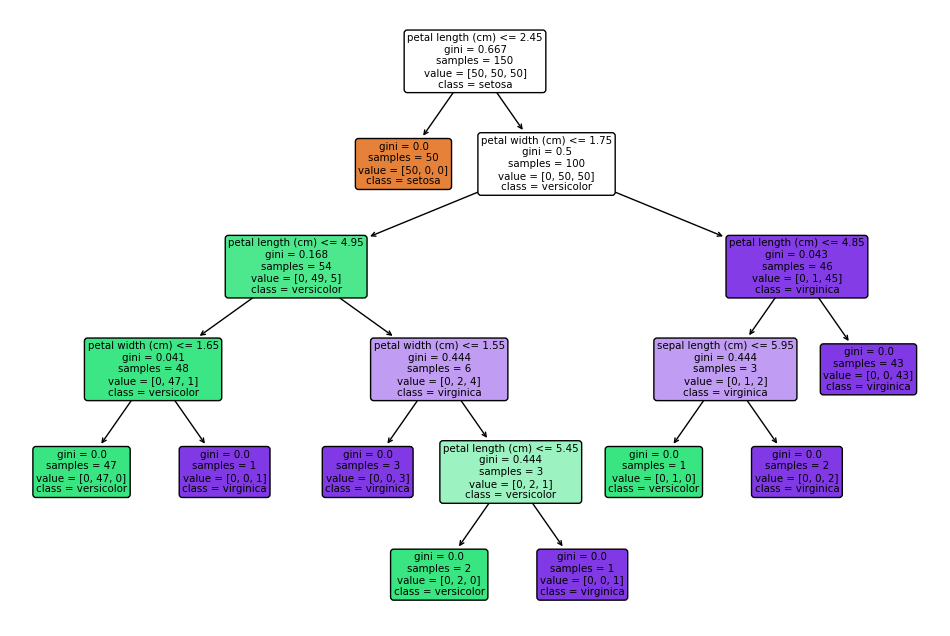

Reglas de decisión:
|--- petal length (cm) <= 2.45
|   |--- weights: [50.00, 0.00, 0.00] class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- weights: [0.00, 47.00, 0.00] class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |   |   |--- sepal l

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear y entrenar un clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

# Mostrar reglas de decisión
tree_rules = export_text(clf, feature_names=iris.feature_names, show_weights=True)
print("Reglas de decisión:")
print(tree_rules)

Este código utiliza el conjunto de datos Iris, que es un conjunto de datos de clasificación multiclase. Entrenamos un árbol de decisión y visualizamos el árbol con la función `plot_tree` de scikit-learn. Además, mostramos las reglas de decisión utilizando `export_text`. 

Recuerda que, en la práctica, es importante ajustar los parámetros del árbol de decisión (como la profundidad máxima) para evitar sobreajuste (overfitting) o subajuste (underfitting) en tu conjunto de datos específico.

**Criterios de División en Árboles de Decisión:**

Los criterios de división son utilizados por los árboles de decisión para determinar cómo dividir los nodos internos en subconjuntos más pequeños durante el proceso de construcción del árbol. Aquí se explican algunos de los criterios comunes para clasificación y regresión:

**Para Clasificación:**

1. **Gini Impurity:**

   - **Definición:** Mide la probabilidad de clasificar incorrectamente una instancia elegida al azar.

   - **Fórmula:**

     $Gini(t) = 1 - \sum_{i=1}^{c} p(i|t)^2$

     donde:

    *  $( t )$ es el nodo

    * $( c )$ es el número de clases

    * $p(i|t)$ es la proporción de instancias de la clase $( i )$ en el nodo $( t )$.

   - **Interpretación:** Un valor de Gini más bajo indica una mayor pureza del nodo.

2. **Chi-Square (Chi-Cuadrado):**

   - **Definición:** Mide la independencia entre las variables categóricas. Es útil cuando las características y las clases son categóricas.

   - **Fórmula:**

     $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$

     donde:

     *  $( O_i )$ es la frecuencia observada.

     * $( E_i )$ es la frecuencia esperada.

   - **Interpretación:** Un valor de Chi-Cuadrado más alto indica mayor dependencia.

3. **Information Gain (Ganancia de Información):**

   - **Definición:** Mide la reducción en la entropía (incertidumbre) después de una división.

   - **Fórmula:**

     $\text{Information Gain} = \text{Entropía}(S) - \sum_{v \in \text{values}} \frac{|S_v|}{|S|} \times \text{Entropía}(S_v)$

     donde:

     *  $( S )$ es el conjunto original

     * $( S_v )$ son los subconjuntos después de la división.

     * $\text{Entropía}(S)$ mide la impureza del conjunto $( S )$.

   - **Interpretación:** Una mayor ganancia de información indica una mejor división.

**Para Regresión:**

1. **Reducción de la Varianza:**

   - **Definición:** Mide la disminución esperada en la varianza después de una división.

   - **Fórmula:**

     $\text{Reducción de la Varianza} = \text{Varianza}(S) - \sum_{v \in \text{values}} \frac{|S_v|}{|S|} \times \text{Varianza}(S_v)$

     donde:

    *  $( S )$ es el conjunto original.

    * $( S_v )$ son los subconjuntos después de la división

    * $\text{Varianza}(S)$ mide la dispersión de los valores en $( S )$.

   - **Interpretación:** Una mayor reducción de la varianza indica una mejor división para la regresión.

**Ejemplo con Gráficos en Python:**

Vamos a utilizar el conjunto de datos Iris y la biblioteca scikit-learn para ilustrar el uso de estos criterios en un clasificador de árbol de decisión.

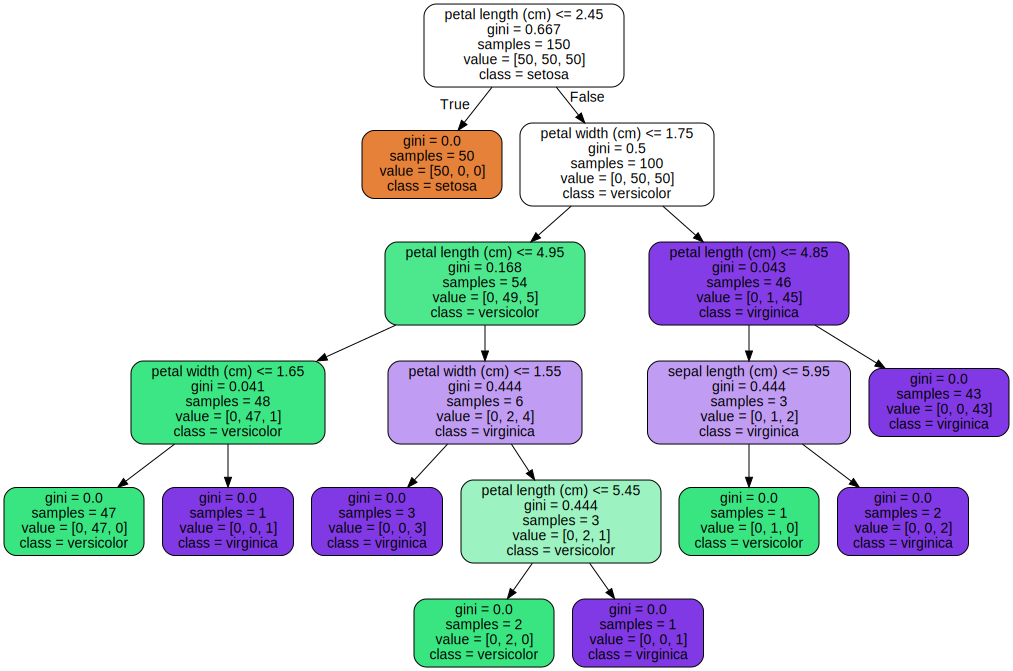

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear y entrenar un clasificador de árbol de decisión con Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X, y)

# Crear y entrenar un clasificador de árbol de decisión con Information Gain
clf_info_gain = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_info_gain.fit(X, y)

# Visualizar el árbol de decisión con Gini
dot_data_gini = export_graphviz(clf_gini, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph_gini = graphviz.Source(dot_data_gini)
graph_gini.render("tree_gini", format="png", cleanup=True)

# Visualizar el árbol de decisión con Information Gain
dot_data_info_gain = export_graphviz(clf_info_gain, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph_info_gain = graphviz.Source(dot_data_info_gain)
graph_info_gain.render("tree_info_gain", format="png", cleanup=True)

# Mostrar árboles
graph_gini

En este ejemplo, entrenamos dos árboles de decisión con criterios diferentes (Gini e Information Gain) y visualizamos los árboles resultantes utilizando la función `export_graphviz` y la biblioteca Graphviz. Los gráficos generados proporcionarán una representación visual de cómo el árbol toma decisiones basadas en diferentes criterios de división. Puedes instalar Graphviz con `pip install graphviz`.

### **Ejemplos**

Exactitud del modelo: 0.50


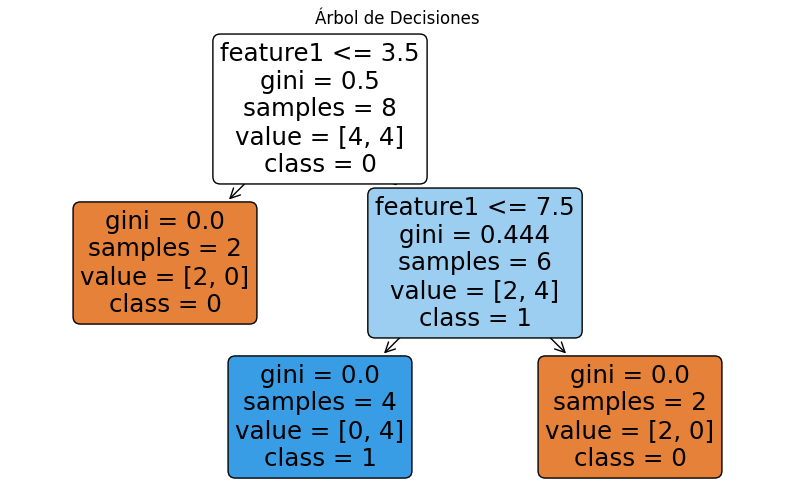

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado df con características (features) X y etiquetas y
# Ejemplo de DataFrame
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [2, 3, 1, 5, 4, 6, 8, 7, 10, 9],
        'label': [0, 0, 0, 1, 1, 1, 1, 0, 1, 0]}
df = pd.DataFrame(data)

# Separar las características (X) y las etiquetas (y)
X = df[['feature1', 'feature2']]
y = df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador Decision Tree
tree_classifier = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

# Visualizar el árbol de decisiones
plt.figure(figsize=(10, 6))
plot_tree(tree_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title('Árbol de Decisiones')
plt.show()


| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./2_K-Nearest-Neighbors.ipynb)| [⏩](./4_Bias_Variance_trade_off.ipynb)|